In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
import pickle

In [3]:
#pickle_file = open("dic_Methanol_cal.pkl", "rb")
#dic_Methanol = pickle.load(pickle_file)

pickle_file = open("dic_Ethanol_cal.pkl", "rb")
dic_Ethanol = pickle.load(pickle_file)

In [4]:
pickle_file = open("dic_samples.pkl", "rb")
dic_samples = pickle.load(pickle_file)



In [6]:
pickle_file = open("dic_samples_norm.pkl", "rb")
dic_samples_norm = pickle.load(pickle_file)

In [7]:
nafion = dic_samples['20-10-23 Nafion EtOH']['0_ EtOH 90 min.CSV']

low = 650
high = 3600


wn = nafion.index
wn =wn[wn > low];

wn = wn[wn < high];

In [8]:
nafion = dic_samples_norm['20-09-30 Nafion Water']['0_ DI 2 hr.CSV']

In [9]:
lab_samples = '20-09-30 Nafion Water'
col_labels = np.round(wn,2).astype('str')
samples = pd.DataFrame(index = dic_samples[lab_samples].keys(),columns = col_labels)


for j in dic_samples[lab_samples]:
    df = dic_samples[lab_samples][j]
    df = df.loc[df.index>low]
    df = df.loc[df.index<high]
    samples.loc[j,:] =np.interp(wn,df.index,df.Absorbance)



Solvent_sat_val = [0,100,12.5,25,37.5,50,62.5,75,87.5]
samples['Water sat'] = Solvent_sat_val
samples.sort_values(by = ['Water sat'],axis = 0, inplace = True)



In [10]:
water = samples.loc[samples['Water sat'] == 100]
water = water.transpose().iloc[:-1,:]

nafion = nafion.loc[nafion.index>low]#& nafion.index <1300]
nafion = nafion.loc[nafion.index<high]

In [11]:
legend = ['water','nafion']
legend.extend(list(dic_samples_norm['20-09-30 Nafion Water'].keys()))
legend

['water',
 'nafion',
 '0_ DI 2 hr.CSV',
 '100_ DI 120 min.CSV',
 '12.5_ DI 60 min.CSV',
 '25_ DI 60 min.CSV',
 '37.5_ DI 90 min.CSV',
 '50_ DI 90 min.CSV',
 '62.5_ DI 95 min.CSV',
 '75_ IPA 90 min.CSV',
 '87.5_ DI 90 min.CSV']

In [12]:
nafion_abs = np.interp(water.index,nafion.index,nafion.Absorbance)

nafion_new = pd.DataFrame(columns = ['wn', 'Absorbance'])

nafion_new['wn'] = water.index
nafion_new['Absorbance'] = nafion_abs
nafion_new.set_index('wn', inplace = True)

nafion = nafion_new

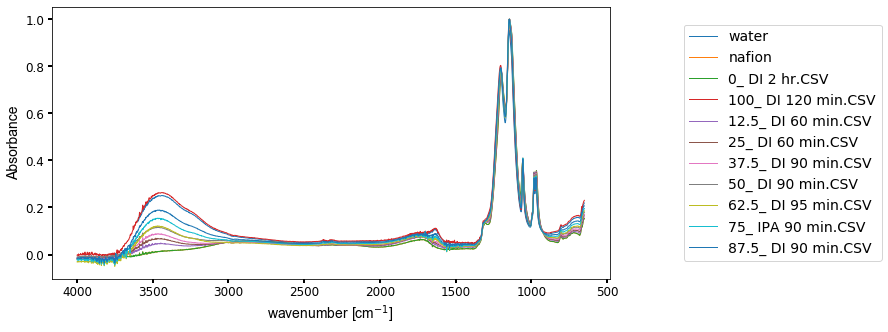

In [13]:
#plot water
#plot nafion
#plot dic_samples_norm['20-09-30 Nafion Water']

fig = plt.figure()
ax = plt.axes()

ax.plot(wn,water.iloc[:,0],linewidth = 1,)

ax.plot(wn,nafion.iloc[:,0],linewidth = 1,)

for j in dic_samples_norm['20-09-30 Nafion Water']:
    df = dic_samples_norm['20-09-30 Nafion Water'][j]
    ax.plot(df.index,df.iloc[:,0],linewidth = 1)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('Absorbance', fontsize=14, fontname = 'Arial')
ax.set_xlabel('wavenumber [cm$^{-1}$]', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(10, 5)
plt.legend(legend, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.show()

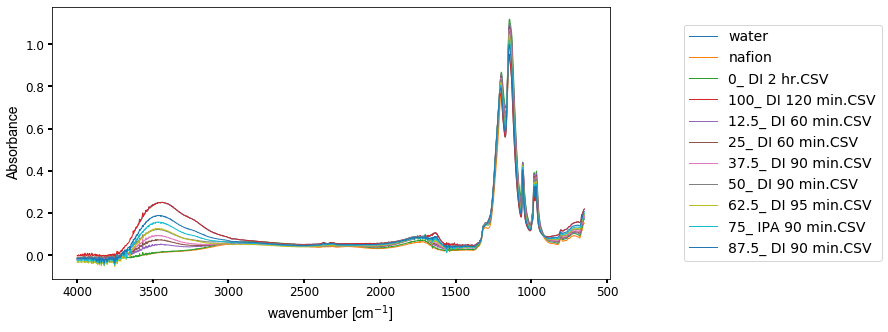

In [14]:
fig = plt.figure()
ax = plt.axes()

ax.plot(wn,water.iloc[:,0],linewidth = 1,)

ax.plot(wn,nafion.iloc[:,0],linewidth = 1,)

for j in dic_samples['20-09-30 Nafion Water']:
    df = dic_samples['20-09-30 Nafion Water'][j]
    ax.plot(df.index,df.iloc[:,0],linewidth = 1)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('Absorbance', fontsize=14, fontname = 'Arial')
ax.set_xlabel('wavenumber [cm$^{-1}$]', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(10, 5)
plt.legend(legend, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.show()

In [15]:
#Range to take into account: 600 to 1300 cm^-1
n = 2
col_labels = wn
col_labels = np.concatenate((['Water','Nafion'],col_labels),axis = 0)
data = pd.DataFrame(np.zeros((n,len(wn)+2)),columns = col_labels)

In [16]:
pure_components = pd.concat([water.iloc[:,0],nafion.iloc[:,0]], axis = 1)
pure_components.columns = ['Water','Nafion']

In [17]:
Comp = np.array([[0],[1]])

In [18]:
data.head()

,Water,Nafion,650.1343,650.3754,650.6165,650.8575,651.0986,651.3397,651.5807,651.8218,...,3597.796,3598.0370000000003,3598.278,3598.5190000000002,3598.76,3599.0009999999997,3599.242,3599.4829999999997,3599.724,3599.965
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
for x in range(len(Comp)):
    vec = Comp[x]
    vec = [vec[0],1-vec[0]]
    spectra = np.sum(vec*pure_components,axis =1)
    data.iloc[x,2:] = np.asarray(spectra)

In [20]:
data.Water = Comp;
data.Nafion = 1-Comp;

In [21]:
data.head()

,Water,Nafion,650.1343,650.3754,650.6165,650.8575,651.0986,651.3397,651.5807,651.8218,...,3597.796,3598.0370000000003,3598.278,3598.5190000000002,3598.76,3599.0009999999997,3599.242,3599.4829999999997,3599.724,3599.965
0,0,1,0.152822,0.152718,0.152479,0.152103,0.151623,0.151099,0.150605,0.150208,...,-0.003482,-0.003173,-0.002864,-0.002608,-0.002439,-0.002369,-0.002393,-0.002500,-0.002688,-0.002954
1,1,0,0.219060,0.218745,0.218475,0.218234,0.217995,0.217730,0.217419,0.217059,...,0.140560,0.140185,0.139866,0.139610,0.139429,0.139326,0.139283,0.139263,0.139207,0.139047


In [37]:
X = data.iloc[:,2:]
y = data.Water


In [38]:
mlp = LinearRegression()
mlp.fit(X,y)


LinearRegression()

In [25]:

samples = pd.DataFrame(index = dic_samples['20-09-30 Nafion Water'].keys(),columns = col_labels)

In [26]:
lab_samples = '20-09-30 Nafion Water'
col_labels = wn
samples = pd.DataFrame(index = dic_samples[lab_samples].keys(),columns = col_labels)


for j in dic_samples[lab_samples]:
    df = dic_samples[lab_samples][j]
    df = df.loc[df.index>low]
    df = df.loc[df.index<high]
    samples.loc[j,:] =np.interp(wn,df.index,df.Absorbance)

In [27]:

water_sat_val = [0,100,12.5,25,37.5,50,62.5,75,87.5]

samples['Water sat'] = water_sat_val

samples.sort_values(by = ['Water sat'],axis = 0, inplace = True)

In [28]:
samples_pca = pca.transform(samples.iloc[:,:-1])

In [29]:
mlp.predict(samples_pca)

array([-0.00988031,  0.12970462,  0.21506346,  0.29470308,  0.4227301 ,
        0.42475991,  0.56439937,  0.71088594,  1.        ])

In [39]:
pca = PCA()
X = pca.fit_transform(X)


mlp_pca = LinearRegression()
mlp_pca.fit(X,y)

LinearRegression()

In [40]:
models = ['LR', 'LR with PCA']

results_water = pd.DataFrame(index = samples.index, columns = models)

results_water['Water %'] = samples['Water sat']

In [41]:
results_water.LR = mlp.predict(samples.iloc[:,:-1])
results_water['LR with PCA'] = mlp_pca.predict(samples_pca)


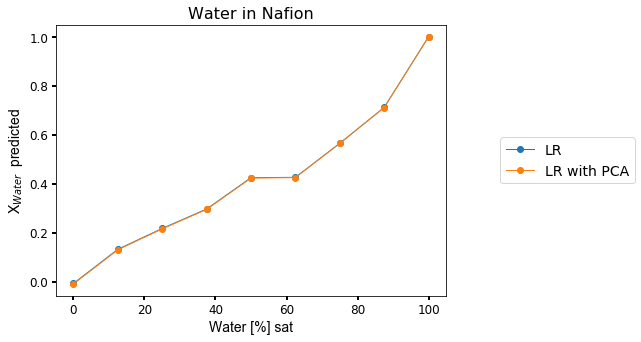

In [42]:
fig = plt.figure()
ax = plt.axes()

for j in models:
    ax.plot(results_water['Water %'],results_water[j],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('X$_{Water}$  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('Water [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
#ax.invert_xaxis()
fig.set_size_inches(7, 5)
plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('Water in Nafion', fontsize = 16)
plt.show()

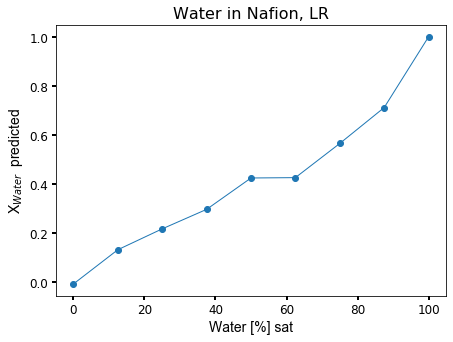

In [43]:
fig = plt.figure()
ax = plt.axes()

ax.plot(results_water['Water %'],results_water['LR'],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('X$_{Water}$  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('Water [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
#ax.invert_xaxis()
fig.set_size_inches(7, 5)
#plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('Water in Nafion, LR', fontsize = 16)
plt.show()

In [49]:
#results_water['LR'].to_csv('water.csv')

D:\Py20190730.12\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [48]:
#results_water.to_csv('results\Water Scores 2 points.csv')

In [44]:
MW  =18 #g/mol, molecular weight
den = 1000 #g/L

results_water.iloc[:,:-1] = results_water.iloc[:,:-1]*den/MW

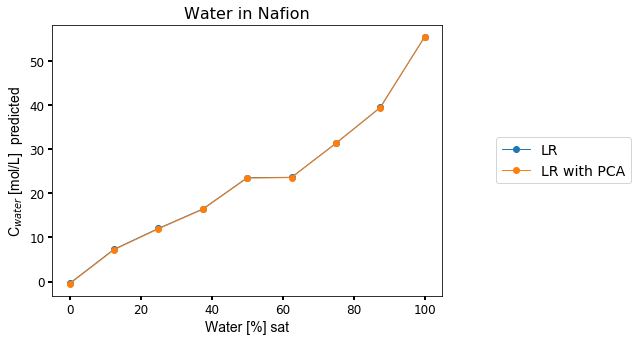

In [45]:
fig = plt.figure()
ax = plt.axes()

for j in models:
    ax.plot(results_water['Water %'],results_water[j],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('C$_{water}$ [mol/L]  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('Water [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
#ax.invert_xaxis()
fig.set_size_inches(7, 5)
plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('Water in Nafion', fontsize = 16)
plt.show()

In [108]:
#results_water.to_csv('results\Water Scores.csv')